# Exploratory Data Analysis - Quantidade de Alunos
Quantidade de alunos por classe

#### Imports

In [86]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', None)

## Load data

In [87]:
PATH = '../data/raw'

### Dados das coordenadas

In [88]:
# Edição manual no arquivo "escolas_enderecos_0.csv" na linha 25881, remoção do "campo" com 00E+91
data = pd.read_csv(os.path.join(PATH, '10_Escolas_Classes_Qtde_Alunos.csv'), sep=';')
print(data.shape)
data.head()

(803941, 18)


,ANO,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,CLASSE,TIPOCLASSE,TIPOCLASSE_DESC,GRAU,TipoEnsino,SERIE,QTDE_ALUNOS,CODVINC
0,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,182570713,0,CLASSE COMUM,1,ENSINO FUNDAMENTAL DE 8 ANOS,8,21,NaN
1,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,182570762,0,CLASSE COMUM,2,ENSINO MEDIO,2,37,NaN
2,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,186061859,1,CLASSE MULTISSERIADA,5,EJA ENSINO MÉDIO,10,25,NaN
3,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,182570440,0,CLASSE COMUM,2,ENSINO MEDIO,2,26,NaN
4,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,182570465,0,CLASSE COMUM,2,ENSINO MEDIO,3,33,NaN


### Filtrar apenas dados de 2018

In [89]:
data = data[data['ANO'] == 2018]
data.shape

(127436, 18)

### Tipos de classes

In [90]:
data['TIPOCLASSE_DESC'].value_counts()

CLASSE COMUM                                 113698
CLASSE MULTISSERIADA                           6045
CLASSE DE SALA DE RECURSOS                     4513
CLASSE DE EF/EM INTEGRAL                       1618
CLASSE DA ED. ESPECIAL ITINERANTE               712
RC-RCI - RECUPERACAO CONTINUA E INTENSIVA       219
RC - RECUPERACAO INTENSIVA DE CICLO             157
RECUPERAÇÃO INTENSIVA - REDE ESTADUAL-SE        113
CLASSE DE RECUPERACAO DE CICLO                  101
ENSINO MEDIO ARTICULADO                          74
CLASSE DE SALA DE RECURSOS MULTIFUNCIONAL        20
CLASSE PIC                                        9
Name: TIPOCLASSE_DESC, dtype: int64

## Agregacao por escola

### Quantidade de alunos na escola

In [91]:
qtd_alunos_escola = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].sum()
qtd_alunos_escola.name = 'QTD_TOTAL_ALUNOS'

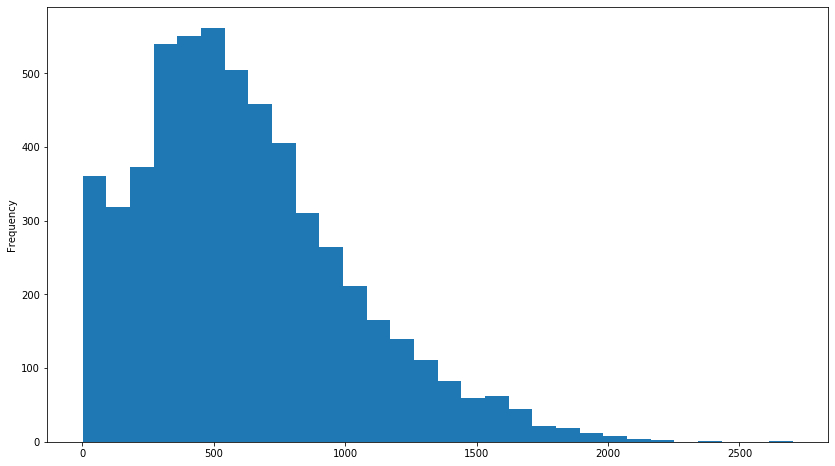

In [92]:
qtd_alunos_escola.plot(kind='hist', bins=30, figsize=(14,8))

### Filtrar classes de acordo com o tipo de ensino
Deixar apenas as classes referentes a ensino nos primeiros anos, removendo algumas salas especiais para nao comprometer a media

In [93]:
data['TipoEnsino'].value_counts()

ENSINO FUNDAMENTAL DE 9 ANOS                   66755
ENSINO MEDIO                                   39350
EJA ENSINO MÉDIO                                5184
EDUCACAO ESPECIAL - DM                          4229
CEL                                             3367
EDUCAÇÃO COMPLEMENTAR                           2906
EJA ENSINO FUNDAMENTAL 5ª A 8ª                  2210
ENSINO FUNDAMENTAL (6º ANO A 9º ANO) - CASA      901
EJA ENSINO FUNDAMENTAL 1ª A 4ª                   714
ENSINO MÉDIO - CASA                              486
ESPECTRO DO AUTISMO                              362
EDUCACAO ESPECIAL - DA                           347
EDUCACAO ESPECIAL - DV                           224
ENSINO FUNDAMENTAL (1º ANO A 5º ANO) - CASA      143
PROJETO EXPLORANDO CURRÍCULO - PEC               130
EDUCACAO ESPECIAL - DF                            85
EDUCACAO INFANTIL                                 37
SALA DE RECURSO ALTAS HABILIDADE                   6
Name: TipoEnsino, dtype: int64

In [94]:
data = data[data['TipoEnsino'].isin(['ENSINO FUNDAMENTAL DE 9 ANOS', 'EDUCAÇÃO COMPLEMENTAR'])]

In [95]:
data['COD_ESC'].nunique()

4601

### Quantidade de classes

In [96]:
qtd_classes = data.groupby(['COD_ESC']).size()
qtd_classes.name = 'QTD_CLASSES'

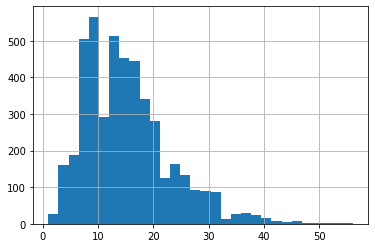

In [97]:
qtd_classes.hist(bins=30)

### Quantidade de alunos nos anos iniciais

In [98]:
qtd_alunos_escola_inicio = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].sum()
qtd_alunos_escola_inicio.name = 'QTD_ALUNOS_ANOS_INICIAIS'

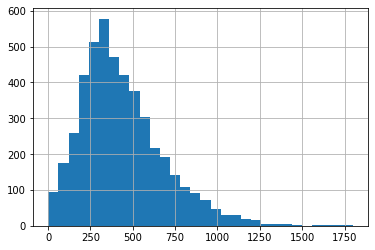

In [99]:
qtd_alunos_escola_inicio.hist(bins=30)

### Quantidade media de alunos por classe

In [100]:
media_alunos_classe = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].mean()
media_alunos_classe.name = 'MEDIA_ALUNOS_SALA'

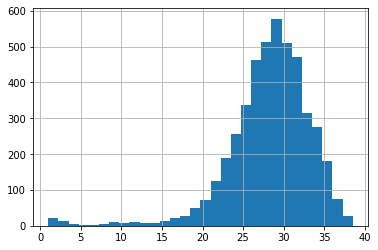

In [101]:
media_alunos_classe.hist(bins=30)

### Desvio padrao da quantidade de alunos por sala

In [114]:
std_alunos_classe = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].std()
std_alunos_classe.fillna(0, inplace=True)
std_alunos_classe.name = 'STD_ALUNOS_SALA'

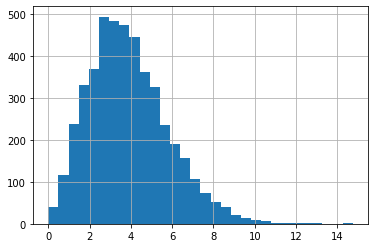

In [105]:
std_alunos_classe.hist(bins=30)

## Juntar caracteristicas

In [117]:
df_escolas = pd.concat([qtd_alunos_escola, qtd_classes, qtd_alunos_escola_inicio, media_alunos_classe, std_alunos_classe], axis=1)

In [121]:
df_escolas.reset_index(inplace=True)
df_escolas.dropna(inplace=True)

In [122]:
df_escolas

,COD_ESC,QTD_TOTAL_ALUNOS,QTD_CLASSES,QTD_ALUNOS_ANOS_INICIAIS,MEDIA_ALUNOS_SALA,STD_ALUNOS_SALA
0,12,563,16.0,563.0,35.187500,0.750000
1,24,2703,34.0,956.0,28.117647,5.866002
2,36,2164,34.0,1189.0,34.970588,1.193043
3,61,909,30.0,897.0,29.900000,1.953776
4,73,460,17.0,460.0,27.058824,4.115073
...,...,...,...,...,...,...
4596,926048,1644,38.0,1133.0,29.815789,5.617806
4597,926059,973,22.0,671.0,30.500000,5.087333
4598,926073,106,4.0,63.0,15.750000,1.707825
4599,926085,31,4.0,31.0,7.750000,4.991660


### Exportar dados

In [123]:
df_escolas.to_csv('../data/processed/alunos_classes.csv', index=False)